<a href="https://colab.research.google.com/github/ShivaShirsath/dl/blob/master/MultiBinary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the OCR letter recognition dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
names = ['letter'] + ['x%d' % i for i in range(1, 17)]
df = pd.read_csv(url, header=None, names=names)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df['letter'], test_size=0.2, random_state=42)

# Preprocess the data
X_train = X_train / 15.0
X_test = X_test / 15.0
y_train = tf.keras.utils.to_categorical(y_train.map(ord) - 65, num_classes=26)
y_test = tf.keras.utils.to_categorical(y_test.map(ord) - 65, num_classes=26)

# Define the deep neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

# Generate predictions on new data
new_data = np.random.rand(10, 16) / 15.0
predictions = model.predict(new_data)
print(predictions)

Epoch 1/10
500/500 [==============================] - 5s 7ms/step - loss: 2.3080 - accuracy: 0.3414 - val_loss: 1.6092 - val_accuracy: 0.5050
Epoch 2/10
500/500 [==============================] - 2s 4ms/step - loss: 1.4115 - accuracy: 0.5851 - val_loss: 1.2589 - val_accuracy: 0.6325
Epoch 3/10
500/500 [==============================] - 3s 5ms/step - loss: 1.2108 - accuracy: 0.6504 - val_loss: 1.1140 - val_accuracy: 0.6762
Epoch 4/10
500/500 [==============================] - 3s 5ms/step - loss: 1.0826 - accuracy: 0.6940 - val_loss: 1.0325 - val_accuracy: 0.6960
Epoch 5/10
500/500 [==============================] - 4s 8ms/step - loss: 0.9810 - accuracy: 0.7176 - val_loss: 0.9320 - val_accuracy: 0.7222
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.9124 - accuracy: 0.7374 - val_loss: 0.8759 - val_accuracy: 0.7412
Epoch 7/10
500/500 [==============================] - 1s 3ms/step - loss: 0.8507 - accuracy: 0.7513 - val_loss: 0.7996 - val_accuracy: 0.7742
Epoch 

Epoch 1/10
500/500 [==============================] - 4s 8ms/step - loss: 0.6861 - accuracy: 0.7929 - val_loss: 0.6607 - val_accuracy: 0.8087
Epoch 2/10
500/500 [==============================] - 3s 7ms/step - loss: 0.6568 - accuracy: 0.7994 - val_loss: 0.6457 - val_accuracy: 0.8035
Epoch 3/10
500/500 [==============================] - 2s 3ms/step - loss: 0.6253 - accuracy: 0.8111 - val_loss: 0.5994 - val_accuracy: 0.8217
Epoch 4/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5977 - accuracy: 0.8177 - val_loss: 0.5663 - val_accuracy: 0.8288
Epoch 5/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5730 - accuracy: 0.8257 - val_loss: 0.6029 - val_accuracy: 0.8125
Epoch 6/10
500/500 [==============================] - 1s 3ms/step - loss: 0.5465 - accuracy: 0.8326 - val_loss: 0.5360 - val_accuracy: 0.8360
Epoch 7/10
500/500 [==============================] - 2s 3ms/step - loss: 0.5260 - accuracy: 0.8382 - val_loss: 0.5216 - val_accuracy: 0.8393
Epoch 

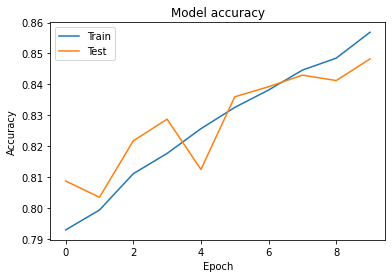

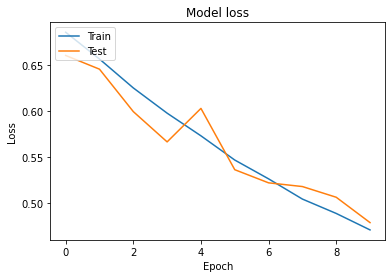

In [ ]:

import matplotlib.pyplot as plt

# Train the model and store the history in a variable
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Plot the training and validation accuracy over each epoch
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot the training and validation loss over each epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 24ms/step


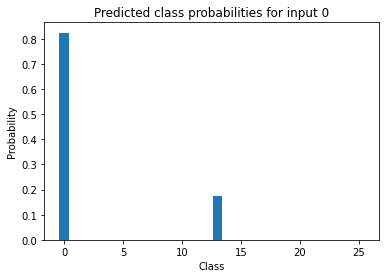

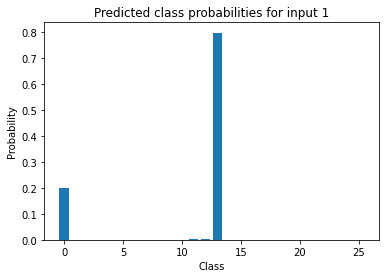

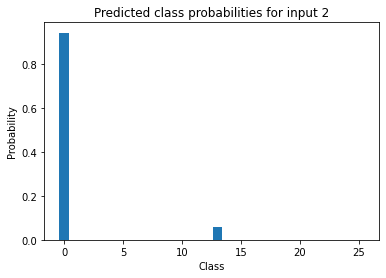

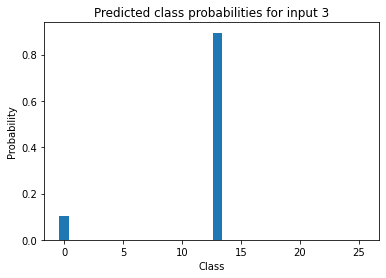

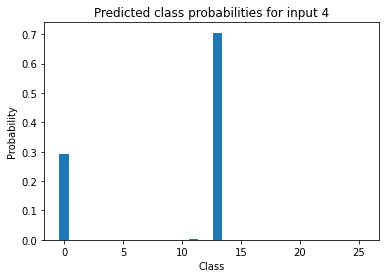

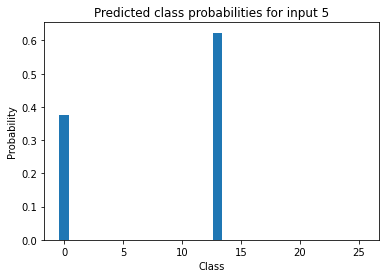

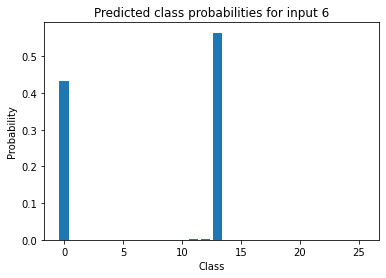

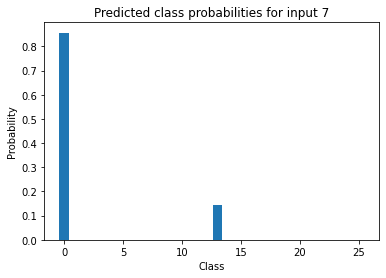

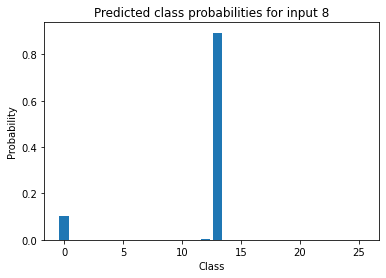

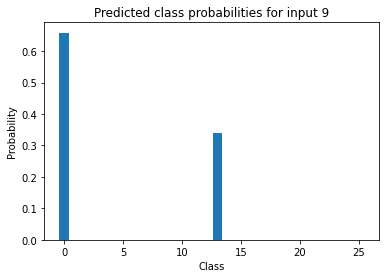

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Generate predictions on new data
new_data = np.random.rand(10, 16) / 15.0
predictions = model.predict(new_data)

# Plot the predicted class probabilities for each input
for i in range(len(predictions)):
  plt.bar(range(len(predictions[i])), predictions[i])
  plt.title('Predicted class probabilities for input {}'.format(i))
  plt.xlabel('Class')
  plt.ylabel('Probability')
  plt.show()

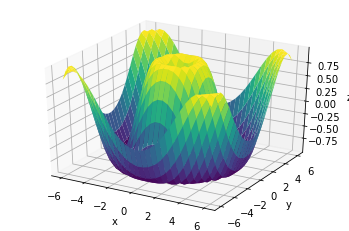

In [ ]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np

# Define the mathematical function to plot
def f(x, y):
  return np.sin(np.sqrt(x**2 + y**2))

# Generate data for the plot
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# Create the 3D plot
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

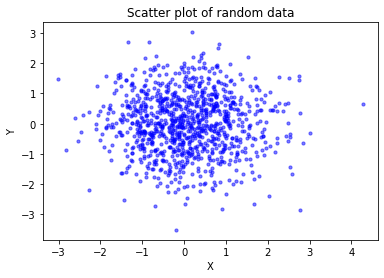